# Task submitted on 14.01.2022 by Rohit Bewoor

## IMPORTANT: change KAGGLE_RUN_FLAG to True to False depending on run-time environment

## Manual inspection of the file - mapped first row of data to check what the data looks like:
#### "tripduration" == 146
#### "starttime" == "2020-12-01 00:02:50.1450"
#### "stoptime" == "2020-12-01 00:05:16.1940"
#### "start station id" == 3202
#### "start station name" == "Newport PATH"
#### "start station latitude" == 40.7272235
#### "start station longitude" == -74.0337589
#### "end station id" == 3199
#### "end station name" == "Newport Pkwy"
#### "end station latitude" == 40.7287448
#### "end station longitude" == -74.0321082
#### "bikeid" == 42308
#### "usertype" == "Subscriber"
#### "birth year" == 1989
#### "gender" == 2

### From the data dictionary:
#### User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
#### Gender (Zero=unknown; 1=male; 2=female)

In [1]:
KAGGLE_RUN_FLAG = True
print(f"{'On Kaggle' if KAGGLE_RUN_FLAG else 'Not Kaggle'}")

On Kaggle


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
from IPython.display import HTML
from datetime import datetime, timedelta

In [3]:
pd.set_option('max_columns', 500)
pd.set_option('max_colwidth', -1)
pd.set_option('max_rows', 500)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [4]:
!ls '../input/celotask/'

JC-202012-citibike-tripdata.csv


In [5]:
WORKDIR = os.getcwd()
print(WORKDIR)

/kaggle/working


In [6]:
OUTDIR = os.path.join(WORKDIR, 'dataout')
print(KAGGLE_RUN_FLAG, OUTDIR)

True /kaggle/working/dataout


In [7]:
if KAGGLE_RUN_FLAG:
    zip_f = None # on kaggle input dataset is already extracted files
else:
    zip_f = os.path.join(WORKDIR, 'JC-202012-citibike-tripdata.csv.zip')
print(zip_f)

None


In [8]:
if not os.path.exists(OUTDIR):
    os.mkdir(OUTDIR)
    print("Created OUTDIR")
    if not KAGGLE_RUN_FLAG:
        print(f"Not on Kaggle")
        try:
            with zipfile.ZipFile(zip_f, 'r') as zf:
                zf.extractall(OUTDIR)
            print(f"Extracted zip file to OUTDIR")
            print(f"Contents:\n{os.listdir(OUTDIR)}")
        except Exception as error_zfile_extract:
            print(f"Problem extracting zipfile, error: {error_zfile_extract}")
else:
    print(f"OUTDIR already existed, no extraction done")

Created OUTDIR


In [9]:
if KAGGLE_RUN_FLAG:
    DATADIR = '../input/celotask/'
else:
    DATADIR = OUTDIR
print(f"DATADIR = {DATADIR}")

DATADIR = ../input/celotask/


#### Load data and insert column for tracking

In [10]:
df = pd.read_csv(
    os.path.join(DATADIR, 'JC-202012-citibike-tripdata.csv'), sep=',', header=0, low_memory=False)
print(len(df))
df.head()

11694


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,146,2020-12-01 00:02:50.1450,2020-12-01 00:05:16.1940,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,Subscriber,1989,2
1,572,2020-12-01 00:11:57.3910,2020-12-01 00:21:30.2510,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,Subscriber,1997,2
2,387,2020-12-01 00:14:49.3610,2020-12-01 00:21:16.8730,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,Subscriber,1960,1
3,188,2020-12-01 00:45:06.3680,2020-12-01 00:48:14.4280,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,Subscriber,1998,1
4,594,2020-12-01 01:17:17.0110,2020-12-01 01:27:11.9400,3212,Christ Hospital,40.734786,-74.050444,3209,Brunswick St,40.724176,-74.050656,44723,Subscriber,1988,1


In [11]:
## inserted row for serial number
df.insert( 0, 'sn', (df.index + 1) )
#df['sn'] = 'sn' + df['sn'].astype(str)
df.head()

,sn,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1,146,2020-12-01 00:02:50.1450,2020-12-01 00:05:16.1940,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,42308,Subscriber,1989,2
1,2,572,2020-12-01 00:11:57.3910,2020-12-01 00:21:30.2510,3640,Journal Square,40.733670,-74.062500,3280,Astor Place,40.719282,-74.071262,18568,Subscriber,1997,2
2,3,387,2020-12-01 00:14:49.3610,2020-12-01 00:21:16.8730,3640,Journal Square,40.733670,-74.062500,3194,McGinley Square,40.725340,-74.067622,44543,Subscriber,1960,1
3,4,188,2020-12-01 00:45:06.3680,2020-12-01 00:48:14.4280,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,43098,Subscriber,1998,1
4,5,594,2020-12-01 01:17:17.0110,2020-12-01 01:27:11.9400,3212,Christ Hospital,40.734786,-74.050444,3209,Brunswick St,40.724176,-74.050656,44723,Subscriber,1988,1


In [12]:
df.columns

Index(['sn', 'tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

## Exploratory Data Analysis

In [13]:
def do_EDA(_indf, _col_list=None, _too_many_limit=40):
    """
    Do basic EDA: Info, Count of unique values, descriptive stats
    Input: 1) input dataframe, 2) list of columns to do EDA on (optional), 3) limit printing unique values
    Returns: Nothing
    """
    print(f"Total rows = {len(_indf)}\n")
    if _col_list is None:
        cols_to_check = _indf.columns
    else:
        cols_to_check = _col_list
    ## info
    print(f"\nInfo:")
    print(f"{df.info()}")
    ## count unique and print values
    print(f"\nUnique values:")
    for idx, colname in enumerate(cols_to_check):
        cnt_uniq_vals = len(_indf[colname].unique())
        print(f"{idx+1:02}) {colname:25} : {cnt_uniq_vals:05} unique values - {_indf[colname].unique() if cnt_uniq_vals < _too_many_limit else 'Too many values'}")
    ## descriptive stats
    print(f"\nDescriptive stats:\n{_indf.describe()}")

In [14]:
do_EDA(df)

Total rows = 11694


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11694 entries, 0 to 11693
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sn                       11694 non-null  int64  
 1   tripduration             11694 non-null  int64  
 2   starttime                11694 non-null  object 
 3   stoptime                 11694 non-null  object 
 4   start station id         11694 non-null  int64  
 5   start station name       11694 non-null  object 
 6   start station latitude   11694 non-null  float64
 7   start station longitude  11694 non-null  float64
 8   end station id           11694 non-null  int64  
 9   end station name         11694 non-null  object 
 10  end station latitude     11694 non-null  float64
 11  end station longitude    11694 non-null  float64
 12  bikeid                   11694 non-null  int64  
 13  usertype                 11694 non-null  object 


In [15]:
print(f"Start time:\nmax = {df['starttime'].max()}\tmin = {df['starttime'].min()}")
print(f"Stop  time:\nmax = {df['stoptime'].max()}\tmin = {df['stoptime'].min()}")

Start time:
max = 2020-12-31 23:48:34.5750	min = 2020-12-01 00:02:50.1450
Stop  time:
max = 2021-01-03 09:18:56.1980	min = 2020-12-01 00:05:16.1940


### EDA notes
#### 1) Total data rows = 11694, 15 variables.
#### 2) Data is clean - no nulls, no missing values, etc.
#### 3) Mix of factor,numeric, and datetime variables.
#### 4) Number of levels for factor variables ranges from 2 to 5
#### 5) 51 start stations and 58 end stations.
#### 6) 576 bike ids
#### 7) Birth year ranges from 1947 to 2003. As this is data for 2012, that means age of user ranges from 65 to 10. The age value of 10 seems too young but assuming the data is correct as business rules allow such a young rider.
#### 8) Tripduration: Maximum = 2.068550e06 seconds = 34475 minutes , Minimum = 6.100000e01 seconds. The minimum time being greater than the 60 second cutoff is okay. But the maximum value is suspect.

#### Verified programtically no tripduration < 60 seconds

In [16]:
print(f"#trips with duration < 60 seconds = {len(df[df['tripduration']<60])}")

#trips with duration < 60 seconds = 0


In [17]:
for v in list(np.arange(1, 24.5, 0.5)):
    max_td_check = v * 60 * 60 # hours to seconds
    print(f"#trips with duration > {max_td_check} seconds (i.e. {v} hours) = {len(df[df['tripduration'] > max_td_check])}")

#trips with duration > 3600.0 seconds (i.e. 1.0 hours) = 303
#trips with duration > 5400.0 seconds (i.e. 1.5 hours) = 135
#trips with duration > 7200.0 seconds (i.e. 2.0 hours) = 69
#trips with duration > 9000.0 seconds (i.e. 2.5 hours) = 44
#trips with duration > 10800.0 seconds (i.e. 3.0 hours) = 39
#trips with duration > 12600.0 seconds (i.e. 3.5 hours) = 33
#trips with duration > 14400.0 seconds (i.e. 4.0 hours) = 26
#trips with duration > 16200.0 seconds (i.e. 4.5 hours) = 25
#trips with duration > 18000.0 seconds (i.e. 5.0 hours) = 23
#trips with duration > 19800.0 seconds (i.e. 5.5 hours) = 23
#trips with duration > 21600.0 seconds (i.e. 6.0 hours) = 23
#trips with duration > 23400.0 seconds (i.e. 6.5 hours) = 22
#trips with duration > 25200.0 seconds (i.e. 7.0 hours) = 21
#trips with duration > 27000.0 seconds (i.e. 7.5 hours) = 20
#trips with duration > 28800.0 seconds (i.e. 8.0 hours) = 20
#trips with duration > 30600.0 seconds (i.e. 8.5 hours) = 20
#trips with duration > 324

#### A tripduration of several hours seems suspect, so assuming a somewhat arbitrary cutoff point of 2 hours and retaining only rows with tripduration < 2 hours

In [18]:
max_td_limit = 2 * 60 * 60 # 2 hours to seconds
len_before = len(df)
print(f"len before = {len(df)}")
df_td_gte_2_hours_removed = df[df['tripduration'] >= max_td_limit]  ## kept this in case its to be referred to later
df = df[df['tripduration'] < max_td_limit]
df = df.reset_index(drop=True)
len_after = len(df)
print(f"len after = {len(df)}")
print(f"count of rows removed = {len_before - len_after}")

len before = 11694
len after = 11625
count of rows removed = 69


#### Creating new column for tripduration in minutes rounded to two decimals
#### Converting starttime and stoptime to pandas datetime format
#### Creating new columns for the day-of-week (0=Monday, 6=Sunday), weekday (Monday-Friday), weekend (Saturday-Sunday)

In [19]:
df['tripduration_mins'] = df['tripduration'] / 60
df['tripduration_mins'] = df['tripduration_mins'].round(2)

df['start_dt'] = pd.to_datetime(df['starttime'])
df['stop_dt'] = pd.to_datetime(df['stoptime'])

df['dayOfWeek'] = df['start_dt'].dt.dayofweek
#df['weekday'] = 0
df['weekend'] = 0
df.loc[ ((df['dayOfWeek'] == 5) | (df['dayOfWeek'] == 6)) , 'weekend'] = 1
#df.loc[df['weekend']==0, 'weekday'] = 1

df.loc[2085:2090]

,sn,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_mins,start_dt,stop_dt,dayOfWeek,weekend
2085,2096,242,2020-12-04 23:41:09.9950,2020-12-04 23:45:12.3420,3276,Marin Light Rail,40.714584,-74.042817,3214,Essex Light Rail,40.712774,-74.036486,42151,Subscriber,1958,1,4.03,2020-12-04 23:41:09.995,2020-12-04 23:45:12.342,4,0
2086,2097,648,2020-12-04 23:44:07.3210,2020-12-04 23:54:56.1580,3206,Hilltop,40.731169,-74.057574,3677,Glenwood Ave,40.727551,-74.071061,40306,Customer,1976,1,10.80,2020-12-04 23:44:07.321,2020-12-04 23:54:56.158,4,0
2087,2098,122,2020-12-05 00:00:16.4040,2020-12-05 00:02:18.7120,3202,Newport PATH,40.727224,-74.033759,3199,Newport Pkwy,40.728745,-74.032108,43693,Subscriber,1989,2,2.03,2020-12-05 00:00:16.404,2020-12-05 00:02:18.712,5,1
2088,2099,215,2020-12-05 00:30:41.7340,2020-12-05 00:34:17.6060,3279,Dixon Mills,40.721630,-74.049968,3186,Grove St PATH,40.719586,-74.043117,17322,Subscriber,1996,1,3.58,2020-12-05 00:30:41.734,2020-12-05 00:34:17.606,5,1
2089,2100,1069,2020-12-05 00:35:50.6580,2020-12-05 00:53:40.2320,3186,Grove St PATH,40.719586,-74.043117,3199,Newport Pkwy,40.728745,-74.032108,17322,Subscriber,1996,1,17.82,2020-12-05 00:35:50.658,2020-12-05 00:53:40.232,5,1
2090,2101,215,2020-12-05 00:39:48.8750,2020-12-05 00:43:24.2640,3273,Manila & 1st,40.721651,-74.042884,3203,Hamilton Park,40.727596,-74.044247,45225,Subscriber,1991,1,3.58,2020-12-05 00:39:48.875,2020-12-05 00:43:24.264,5,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11625 entries, 0 to 11624
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   sn                       11625 non-null  int64         
 1   tripduration             11625 non-null  int64         
 2   starttime                11625 non-null  object        
 3   stoptime                 11625 non-null  object        
 4   start station id         11625 non-null  int64         
 5   start station name       11625 non-null  object        
 6   start station latitude   11625 non-null  float64       
 7   start station longitude  11625 non-null  float64       
 8   end station id           11625 non-null  int64         
 9   end station name         11625 non-null  object        
 10  end station latitude     11625 non-null  float64       
 11  end station longitude    11625 non-null  float64       
 12  bikeid                   11625 n

#### Creating new column for time-of-day based on value of the starttime hour with binning as:
##### 0600 to 1200 = morning
##### 1200 to 1700 = afternoon
##### 1700 to 2300 = evening
##### 2300 to 0600 = night

In [21]:
df['start_hour'] = df['start_dt'].dt.hour

In [22]:
## Morning (0600-1159), Afternoon(1200-1659), Evening(1700-2259), Night(2300-0559)
hour_bins = [0, 5, 11, 16, 22, 23]
time_bin_labels = ['night1', 'morning','afternoon','evening','night2']
df['timeOfDay'] = pd.cut(df['start_hour'], bins=hour_bins, labels=time_bin_labels, include_lowest=True)
## replace night1 and night2 as just night
df['timeOfDay'] = df['timeOfDay'].str.replace('night.', 'night', regex=True)

In [23]:
df.loc[2070:2100]

,sn,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_mins,start_dt,stop_dt,dayOfWeek,weekend,start_hour,timeOfDay
2070,2081,306,2020-12-04 22:32:42.2420,2020-12-04 22:37:48.3260,3203,Hamilton Park,40.727596,-74.044247,3187,Warren St,40.721124,-74.038051,40318,Customer,1969,0,5.10,2020-12-04 22:32:42.242,2020-12-04 22:37:48.326,4,0,22,evening
2071,2082,861,2020-12-04 22:33:48.6300,2020-12-04 22:48:10.1930,3225,Baldwin at Montgomery,40.723659,-74.064194,3225,Baldwin at Montgomery,40.723659,-74.064194,42526,Subscriber,1979,1,14.35,2020-12-04 22:33:48.630,2020-12-04 22:48:10.193,4,0,22,evening
2072,2083,439,2020-12-04 22:34:18.9340,2020-12-04 22:41:38.9240,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,44241,Subscriber,1991,2,7.32,2020-12-04 22:34:18.934,2020-12-04 22:41:38.924,4,0,22,evening
2073,2084,203,2020-12-04 22:35:56.1060,2020-12-04 22:39:19.3160,3186,Grove St PATH,40.719586,-74.043117,3270,Jersey & 6th St,40.725289,-74.045572,42810,Subscriber,1960,1,3.38,2020-12-04 22:35:56.106,2020-12-04 22:39:19.316,4,0,22,evening
2074,2085,608,2020-12-04 22:43:26.1100,2020-12-04 22:53:34.1370,3275,Columbus Drive,40.718355,-74.038914,3199,Newport Pkwy,40.728745,-74.032108,17322,Customer,1976,1,10.13,2020-12-04 22:43:26.110,2020-12-04 22:53:34.137,4,0,22,evening
2075,2086,485,2020-12-04 22:55:22.2710,2020-12-04 23:03:28.2630,3199,Newport Pkwy,40.728745,-74.032108,3199,Newport Pkwy,40.728745,-74.032108,47254,Customer,1976,1,8.08,2020-12-04 22:55:22.271,2020-12-04 23:03:28.263,4,0,22,evening
2076,2087,610,2020-12-04 22:58:37.4650,2020-12-04 23:08:48.2700,3199,Newport Pkwy,40.728745,-74.032108,3279,Dixon Mills,40.721630,-74.049968,17322,Subscriber,1996,1,10.17,2020-12-04 22:58:37.465,2020-12-04 23:08:48.270,4,0,22,evening
2077,2088,298,2020-12-04 22:59:58.7820,2020-12-04 23:04:56.9890,3187,Warren St,40.721124,-74.038051,3267,Morris Canal,40.712419,-74.038526,42150,Subscriber,1988,1,4.97,2020-12-04 22:59:58.782,2020-12-04 23:04:56.989,4,0,22,evening
2078,2089,121,2020-12-04 23:00:29.9750,2020-12-04 23:02:31.6500,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3275,Columbus Drive,40.718355,-74.038914,29339,Subscriber,1966,1,2.02,2020-12-04 23:00:29.975,2020-12-04 23:02:31.650,4,0,23,night
2079,2090,250,2020-12-04 23:04:36.8630,2020-12-04 23:08:47.2000,3186,Grove St PATH,40.719586,-74.043117,3209,Brunswick St,40.724176,-74.050656,26857,Subscriber,1988,1,4.17,2020-12-04 23:04:36.863,2020-12-04 23:08:47.200,4,0,23,night


## Analysis

In [24]:
df.columns

Index(['sn', 'tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'tripduration_mins', 'start_dt', 'stop_dt',
       'dayOfWeek', 'weekend', 'start_hour', 'timeOfDay'],
      dtype='object')

In [25]:
print(f"Total number of rides in the timeframe = {len(df)}")

Total number of rides in the timeframe = 11625


### RideCount vs Usertype

In [26]:
df.groupby('usertype')['sn'].agg(['count'])

,count
usertype,
Customer,2243
Subscriber,9382


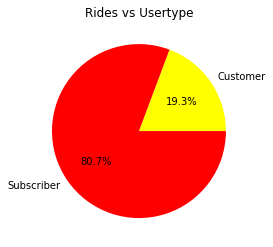

In [27]:
#df.plot.pie(y='usertype', figsize=(5, 5))
ax = df.groupby('usertype')['sn'].agg(['count']).plot(kind='pie', y='count', ylabel='', #label=False, 
                                                 autopct='%1.1f%%', colors = ['yellow', 'red'],
                                                 legend=False)
plt.title('Rides vs Usertype')
ax.plot()

fig = ax.get_figure()
fig.savefig(os.path.join(OUTDIR, 'pie_Rides_vs_Usertype'))

In [28]:
#!rm /kaggle/working/dataout/*.png

### RideCount vs Sex

In [29]:
df['gender1'] = df['gender']
df=df.replace({'gender1': {0 : 'Unknown', 1 : 'Male', 2: 'Female'}})

In [30]:
df.groupby('gender1')['sn'].agg(['count'])

,count
gender1,
Female,2550
Male,7746
Unknown,1329


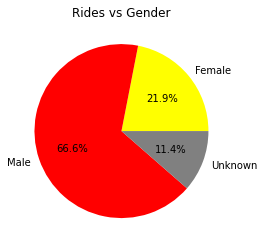

In [31]:
ax = df.groupby('gender1')['sn'].agg(['count']).plot(kind='pie', y='count', ylabel='', #label=False, 
                                                 autopct='%1.1f%%', colors = ['yellow', 'red', 'gray'],
                                                 legend=False)
plt.title('Rides vs Gender')
ax.plot()

fig = ax.get_figure()
fig.savefig(os.path.join(OUTDIR, 'pie_Rides_vs_Gender'))

### RideCount vs Weekday Type

In [32]:
df['weekend1'] = df['weekend']
df=df.replace({'weekend1': {0 : 'Weekday', 1 : 'Weekend'}})
df['dayOfWeek1'] = df['dayOfWeek']
df=df.replace({'dayOfWeek1': {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6: 'Sunday'}})

In [33]:
print(f"Baseline %: Weekday = {5 * 100/7:.1f}\tWeekend = {2 * 100/7:.1f}")

Baseline %: Weekday = 71.4	Weekend = 28.6


In [34]:
grouped_df = df.groupby('weekend')['sn'].agg(['count'])
grouped_df['weekday_type_percent'] = grouped_df.apply(lambda x: 100 * x / float(x.sum()))
grouped_df['weekday_type_percent'] = grouped_df['weekday_type_percent'].round(1)
grouped_df.reset_index(inplace=True)
grouped_df['weekday_type1'] = grouped_df['weekend']
grouped_df=grouped_df.replace({'weekday_type1': {0 : 'Weekday', 1 : 'Weekend'}})
grouped_df

,weekend,count,weekday_type_percent,weekday_type1
0,0,8618,74.1,Weekday
1,1,3007,25.9,Weekend


In [35]:
grouped_df = df.groupby('dayOfWeek')['sn'].agg(['count'])
grouped_df['dayOfWeek1_percent'] = grouped_df.apply(lambda x: 100 * x / float(x.sum()))
grouped_df['dayOfWeek1_percent'] = grouped_df['dayOfWeek1_percent'].round(1)
grouped_df.reset_index(inplace=True)
grouped_df['dayOfWeek1'] = grouped_df['dayOfWeek']
grouped_df=grouped_df.replace({'dayOfWeek1': {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6: 'Sunday'}})
grouped_df

,dayOfWeek,count,dayOfWeek1_percent,dayOfWeek1
0,0,1397,12.0,Monday
1,1,2213,19.0,Tuesday
2,2,1914,16.5,Wednesday
3,3,1757,15.1,Thursday
4,4,1337,11.5,Friday
5,5,1322,11.4,Saturday
6,6,1685,14.5,Sunday


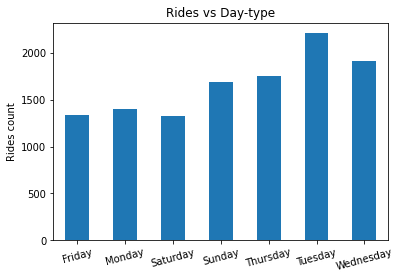

In [36]:
ax = df.groupby('dayOfWeek1')['sn'].agg(['count']).plot(kind='bar', y='count', ylabel='', rot = 15, #label=False, 
#                                                 autopct='%1.1f%%', #colors = ['yellow', 'red'],
                                                 legend=False)
plt.title('Rides vs Day-type')
plt.xlabel('') #('Weekday')
plt.ylabel("Rides count")
ax.plot()

fig = ax.get_figure()
fig.savefig(os.path.join(OUTDIR, 'bar_Rides_vs_WeekdayType'))

### vs Time of Day and UserType

In [37]:
grouped_df = df.groupby(['timeOfDay', 'usertype'])['sn'].agg(['count'])
grouped_df

count
timeOfDay usertype         
afternoon Customer    1100 
          Subscriber  3768 
evening   Customer    617  
          Subscriber  2649 
morning   Customer    412  
          Subscriber  2634 
night     Customer    114  
          Subscriber  331

In [38]:
grouped_df = grouped_df.unstack(level=-1)
grouped_df

count           
usertype  Customer Subscriber
timeOfDay                    
afternoon  1100     3768     
evening    617      2649     
morning    412      2634     
night      114      331

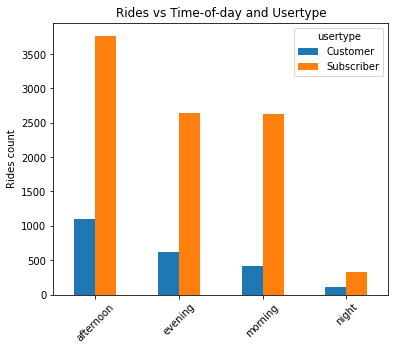

In [39]:
ax = grouped_df.plot(kind='bar', y='count', ylabel='', rot = 45, figsize=(6, 5), #label=False, 
#                     autopct='%1.1f%%', #colors = ['yellow', 'red'],
                     legend=True)
plt.title('Rides vs Time-of-day and Usertype')
plt.xlabel('') #('Weekday')
plt.ylabel("Rides count")
ax.plot()

fig = ax.get_figure()
fig.savefig(os.path.join(OUTDIR, 'unstackedBar_Rides_vs_TimeOfDay_UserType'))

### Tripduration average overall

In [40]:
total_tripduration_sum = df['tripduration_mins'].sum()
total_count = len(df)
print(f"total_tripduration_sum = {total_tripduration_sum}")
print(f"total data points count = {total_count}")
print(f"average tripduration overall = {total_tripduration_sum / total_count:.2f}")

total_tripduration_sum = 148808.32
total data points count = 11625
average tripduration overall = 12.80


### Tripduration vs Usertype

In [41]:
grouped_df = df.groupby('dayOfWeek')['tripduration_mins'].mean().to_frame()
grouped_df.rename( columns={'tripduration_mins': 'tripduration_mins_avg'}, inplace=True )
grouped_df['tripduration_mins_avg'] = grouped_df['tripduration_mins_avg'].round(2)
grouped_df.reset_index(inplace=True)
grouped_df['dayOfWeek1'] = grouped_df['dayOfWeek']
grouped_df=grouped_df.replace({'dayOfWeek1': {0 : 'Monday', 1 : 'Tuesday', 2 : 'Wednesday', 3 : 'Thursday', 4 : 'Friday', 5 : 'Saturday', 6: 'Sunday'}})
grouped_df

,dayOfWeek,tripduration_mins_avg,dayOfWeek1
0,0,11.74,Monday
1,1,10.56,Tuesday
2,2,10.67,Wednesday
3,3,12.36,Thursday
4,4,11.99,Friday
5,5,14.47,Saturday
6,6,18.84,Sunday


In [42]:
## verifying that mean correctly calcuated - matches against monday
monday_sum = df.loc[df['dayOfWeek1']=='Monday', 'tripduration_mins'].sum()
monday_count = len(df.loc[df['dayOfWeek1']=='Monday', 'tripduration_mins'])
print(f"monday sum = {monday_sum}")
print(f"monday data points count = {monday_count}")
print(f"monday average = {monday_sum / monday_count:.2f}")

monday sum = 16397.120000000003
monday data points count = 1397
monday average = 11.74


In [43]:
del(grouped_df['dayOfWeek'])
grouped_df.columns

Index(['tripduration_mins_avg', 'dayOfWeek1'], dtype='object')

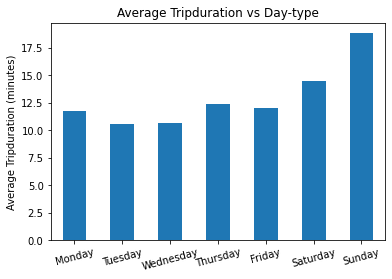

In [44]:
ax = grouped_df.plot(kind='bar', y='tripduration_mins_avg', x='dayOfWeek1', ylabel='', rot = 15, #label=False, 
#                                                 autopct='%1.1f%%', #colors = ['yellow', 'red'],
                                                 legend=False)
plt.title('Average Tripduration vs Day-type')
plt.xlabel('') #('Weekday')
plt.ylabel("Average Tripduration (minutes)")
ax.plot()

fig = ax.get_figure()
fig.savefig(os.path.join(OUTDIR, 'bar_Tripduration_vs_WeekdayType'))

### Analysis to find most popular routes: from Start location id to Stop location id

In [45]:
df.columns

Index(['sn', 'tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'tripduration_mins', 'start_dt', 'stop_dt',
       'dayOfWeek', 'weekend', 'start_hour', 'timeOfDay', 'gender1',
       'weekend1', 'dayOfWeek1'],
      dtype='object')

In [46]:
start_ids = list(df['start station id'].unique())
start_ids.sort()
end_ids = list(df['end station id'].unique())
end_ids.sort()
print(f"start ids ({len(start_ids)}):\n{start_ids}\n\nend ids ({len(end_ids)}):\n{end_ids}")

start ids (51):
[3184, 3185, 3186, 3187, 3191, 3192, 3193, 3194, 3195, 3196, 3198, 3199, 3201, 3202, 3203, 3205, 3206, 3207, 3209, 3210, 3211, 3212, 3213, 3214, 3220, 3225, 3267, 3268, 3269, 3270, 3272, 3273, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3481, 3483, 3638, 3639, 3640, 3677, 3678, 3679, 3681, 3694, 3791, 3792]

end ids (55):
[127, 514, 3184, 3185, 3186, 3187, 3191, 3192, 3193, 3194, 3195, 3196, 3198, 3199, 3201, 3202, 3203, 3205, 3206, 3207, 3209, 3210, 3211, 3212, 3213, 3214, 3220, 3225, 3267, 3268, 3269, 3270, 3272, 3273, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3481, 3483, 3638, 3639, 3640, 3664, 3677, 3678, 3679, 3681, 3694, 3791, 3792, 4071]


In [47]:
#from 3184 to 127 = 1 trip
df.loc[ ((df['start station id']==3184) & (df['end station id']==127)) ]

,sn,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_mins,start_dt,stop_dt,dayOfWeek,weekend,start_hour,timeOfDay,gender1,weekend1,dayOfWeek1
7807,7851,1479,2020-12-18 09:25:14.7640,2020-12-18 09:49:53.8220,3184,Paulus Hook,40.714145,-74.033552,127,Barrow St & Hudson St,40.731724,-74.006744,44492,Subscriber,1974,1,24.65,2020-12-18 09:25:14.764,2020-12-18 09:49:53.822,4,0,9,morning,Male,Weekday,Friday


In [48]:
#from 3184 to 3184 = 16 trip
len(df.loc[ ((df['start station id']==3184) & (df['end station id']==3184)) ])

16

In [49]:
start_end_counts_arr = np.zeros((len(start_ids), len(end_ids)), dtype=int)
start_end_counts_arr.shape

(51, 55)

In [50]:
for rx, start_id in enumerate(start_ids):
    for cx, end_id in enumerate(end_ids):
        start_end_counts_arr[rx, cx] = len(df.loc[ ((df['start station id']==start_id) & (df['end station id']==end_id)) ])
print(f"Done")

Done


In [51]:
## populated np array
start_end_counts_arr

array([[ 1,  0, 16, ...,  0,  8,  0],
       [ 0,  0,  1, ...,  1,  1,  0],
       [ 0,  0,  8, ...,  4,  8,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 13,  2,  1],
       [ 0,  1,  5, ...,  0, 14,  0]])

In [52]:
## view the data as a dataframe
df_start_end_counts = pd.DataFrame(start_end_counts_arr, columns=end_ids, index=start_ids)
df_start_end_counts

,127,514,3184,3185,3186,3187,3191,3192,3193,3194,3195,3196,3198,3199,3201,3202,3203,3205,3206,3207,3209,3210,3211,3212,3213,3214,3220,3225,3267,3268,3269,3270,3272,3273,3275,3276,3277,3278,3279,3280,3281,3481,3483,3638,3639,3640,3664,3677,3678,3679,3681,3694,3791,3792,4071
3184,1,0,16,11,14,11,0,2,0,3,1,1,0,26,0,6,17,2,0,0,3,0,4,0,4,1,0,0,13,8,3,4,3,1,6,9,0,2,2,2,0,2,7,8,18,1,0,1,0,3,3,0,0,8,0
3185,0,0,1,25,12,0,2,27,0,2,1,0,1,14,0,6,25,14,2,0,13,0,8,0,20,4,0,5,17,20,9,13,6,2,10,31,11,4,4,0,0,8,6,8,10,0,0,0,0,0,9,0,1,1,0
3186,0,0,8,16,11,17,0,39,1,6,0,0,1,26,0,12,41,62,2,0,59,1,4,0,40,11,2,22,33,27,54,41,18,1,4,58,17,21,47,1,0,13,20,8,6,0,0,0,0,2,9,0,4,8,0
3187,0,0,6,3,8,62,0,5,0,10,2,1,0,66,0,32,12,14,2,0,3,3,2,0,5,13,0,2,14,0,5,6,4,2,3,12,0,7,2,1,0,6,15,23,0,0,0,1,0,0,9,0,3,19,0
3191,0,0,0,5,1,0,7,2,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,6,0,0,0
3192,0,0,3,27,42,6,2,77,0,1,0,0,0,6,1,3,1,7,0,0,1,0,6,0,9,3,0,3,2,16,1,1,6,6,1,5,3,2,3,2,0,1,4,4,13,0,0,1,2,0,5,1,10,11,0
3193,0,0,0,1,3,0,2,1,24,4,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,2,1,0,0,0,0,0,0,1,21,1,1,0,2,0,3,0,3,4,4,0,1,1,1,0
3194,0,0,1,1,1,0,1,3,1,7,115,0,0,2,0,2,4,1,3,1,1,4,1,0,6,0,0,13,1,1,1,0,0,2,1,7,0,1,2,7,3,1,1,0,6,6,0,0,4,5,3,1,0,0,0
3195,0,0,3,5,2,2,6,3,26,95,26,2,2,19,6,1,4,1,3,4,8,15,4,9,5,0,2,104,0,5,2,2,2,0,0,0,1,3,2,51,2,0,1,2,0,4,0,19,83,58,1,2,2,5,0
3196,0,0,1,1,2,1,1,0,0,0,2,1,8,9,1,2,5,0,5,0,1,3,0,2,2,0,0,3,0,0,3,0,1,2,1,0,0,0,0,0,0,0,0,1,6,1,0,0,0,1,1,0,0,1,0


#### View and save as a heatmap

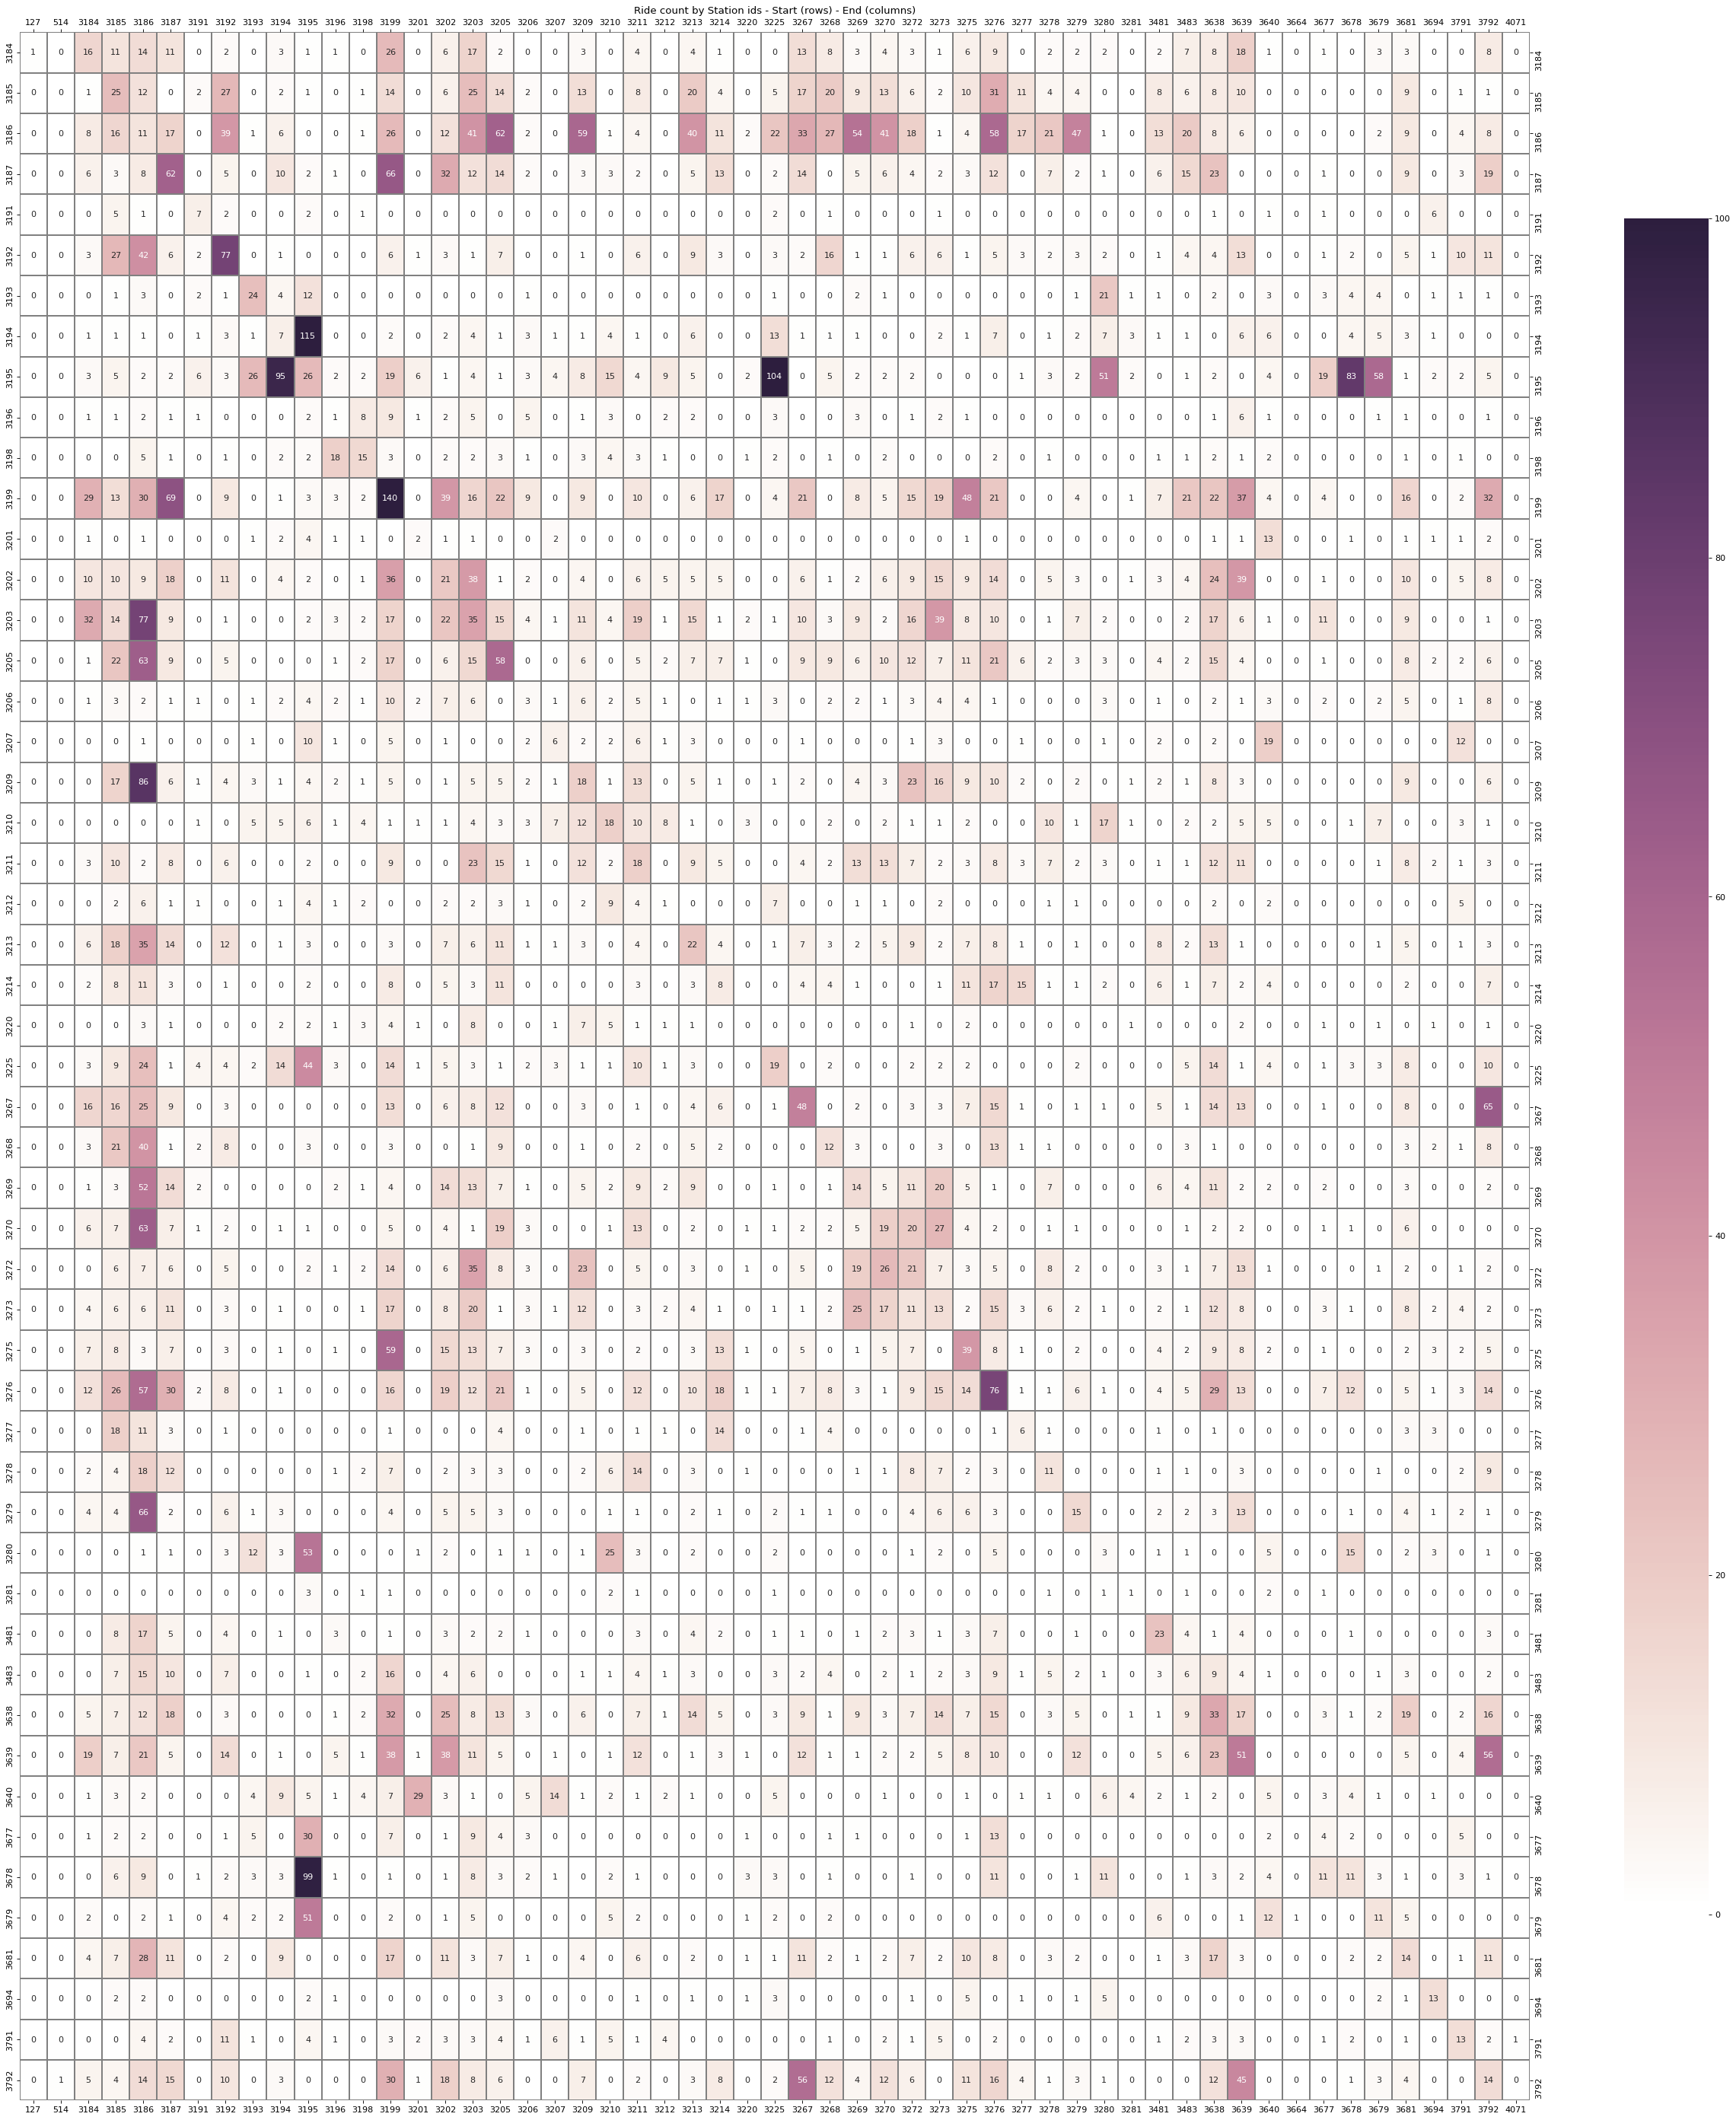

In [53]:
fig = plt.figure(num=None, figsize=(40, 45), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(df_start_end_counts, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.tick_params(right=True, top=True, labelright=True, labeltop=True)

plt.title("Ride count by Station ids - Start (rows) - End (columns)")

plt.savefig(os.path.join(OUTDIR, 'sns_heatmap.png'))

plt.show()

### Extract top 20 busiest routes

In [54]:
## identify top 20 routes
top_n = 20

In [55]:
df_start_end_counts.columns

Int64Index([ 127,  514, 3184, 3185, 3186, 3187, 3191, 3192, 3193, 3194, 3195,
            3196, 3198, 3199, 3201, 3202, 3203, 3205, 3206, 3207, 3209, 3210,
            3211, 3212, 3213, 3214, 3220, 3225, 3267, 3268, 3269, 3270, 3272,
            3273, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3481, 3483, 3638,
            3639, 3640, 3664, 3677, 3678, 3679, 3681, 3694, 3791, 3792, 4071],
           dtype='int64')

In [56]:
df_start_end_counts.index

Int64Index([3184, 3185, 3186, 3187, 3191, 3192, 3193, 3194, 3195, 3196, 3198,
            3199, 3201, 3202, 3203, 3205, 3206, 3207, 3209, 3210, 3211, 3212,
            3213, 3214, 3220, 3225, 3267, 3268, 3269, 3270, 3272, 3273, 3275,
            3276, 3277, 3278, 3279, 3280, 3281, 3481, 3483, 3638, 3639, 3640,
            3677, 3678, 3679, 3681, 3694, 3791, 3792],
           dtype='int64')

In [57]:
start_end_counts_arr_flat = start_end_counts_arr.flatten()
ind_flat = np.argpartition(start_end_counts_arr_flat, -top_n)[-top_n:]
ind_2d = list()
for ind in ind_flat:
    ind_2d.append(np.unravel_index(ind, start_end_counts_arr.shape))
print(ind_2d)

[(2, 20), (32, 13), (26, 53), (29, 4), (15, 4), (2, 17), (3, 5), (3, 13), (8, 9), (7, 10), (14, 4), (36, 4), (8, 48), (8, 27), (33, 35), (5, 7), (11, 13), (11, 5), (18, 4), (45, 10)]


In [58]:
cnt_from_to = list()
for ri, ci in ind_2d:
    cnt = df_start_end_counts.iloc[ri,ci]
    from_station = df_start_end_counts.index[ri]
    end_station = df_start_end_counts.columns[ci]
    print(f"({ri},{ci})\tcount = {cnt}\tstart station = {from_station}\tend station = {end_station}")
    cnt_from_to.append((cnt, from_station, end_station))
print(f"\ncnt_from_to =\n{cnt_from_to}")

(2,20)	count = 59	start station = 3186	end station = 3209
(32,13)	count = 59	start station = 3275	end station = 3199
(26,53)	count = 65	start station = 3267	end station = 3792
(29,4)	count = 63	start station = 3270	end station = 3186
(15,4)	count = 63	start station = 3205	end station = 3186
(2,17)	count = 62	start station = 3186	end station = 3205
(3,5)	count = 62	start station = 3187	end station = 3187
(3,13)	count = 66	start station = 3187	end station = 3199
(8,9)	count = 95	start station = 3195	end station = 3194
(7,10)	count = 115	start station = 3194	end station = 3195
(14,4)	count = 77	start station = 3203	end station = 3186
(36,4)	count = 66	start station = 3279	end station = 3186
(8,48)	count = 83	start station = 3195	end station = 3678
(8,27)	count = 104	start station = 3195	end station = 3225
(33,35)	count = 76	start station = 3276	end station = 3276
(5,7)	count = 77	start station = 3192	end station = 3192
(11,13)	count = 140	start station = 3199	end station = 3199
(11,5)	cou

In [59]:
df_cnt_from_to = pd.DataFrame(cnt_from_to, columns=['ride_count', 'from_station_id', 'to_station_id'])
df_cnt_from_to.sort_values('ride_count', ascending=False, inplace=True)
HTML(df_cnt_from_to.to_html(index=False))

ride_count,from_station_id,to_station_id
140,3199,3199
115,3194,3195
104,3195,3225
99,3678,3195
95,3195,3194
86,3209,3186
83,3195,3678
77,3192,3192
77,3203,3186
76,3276,3276


#### View and save as a heatmap

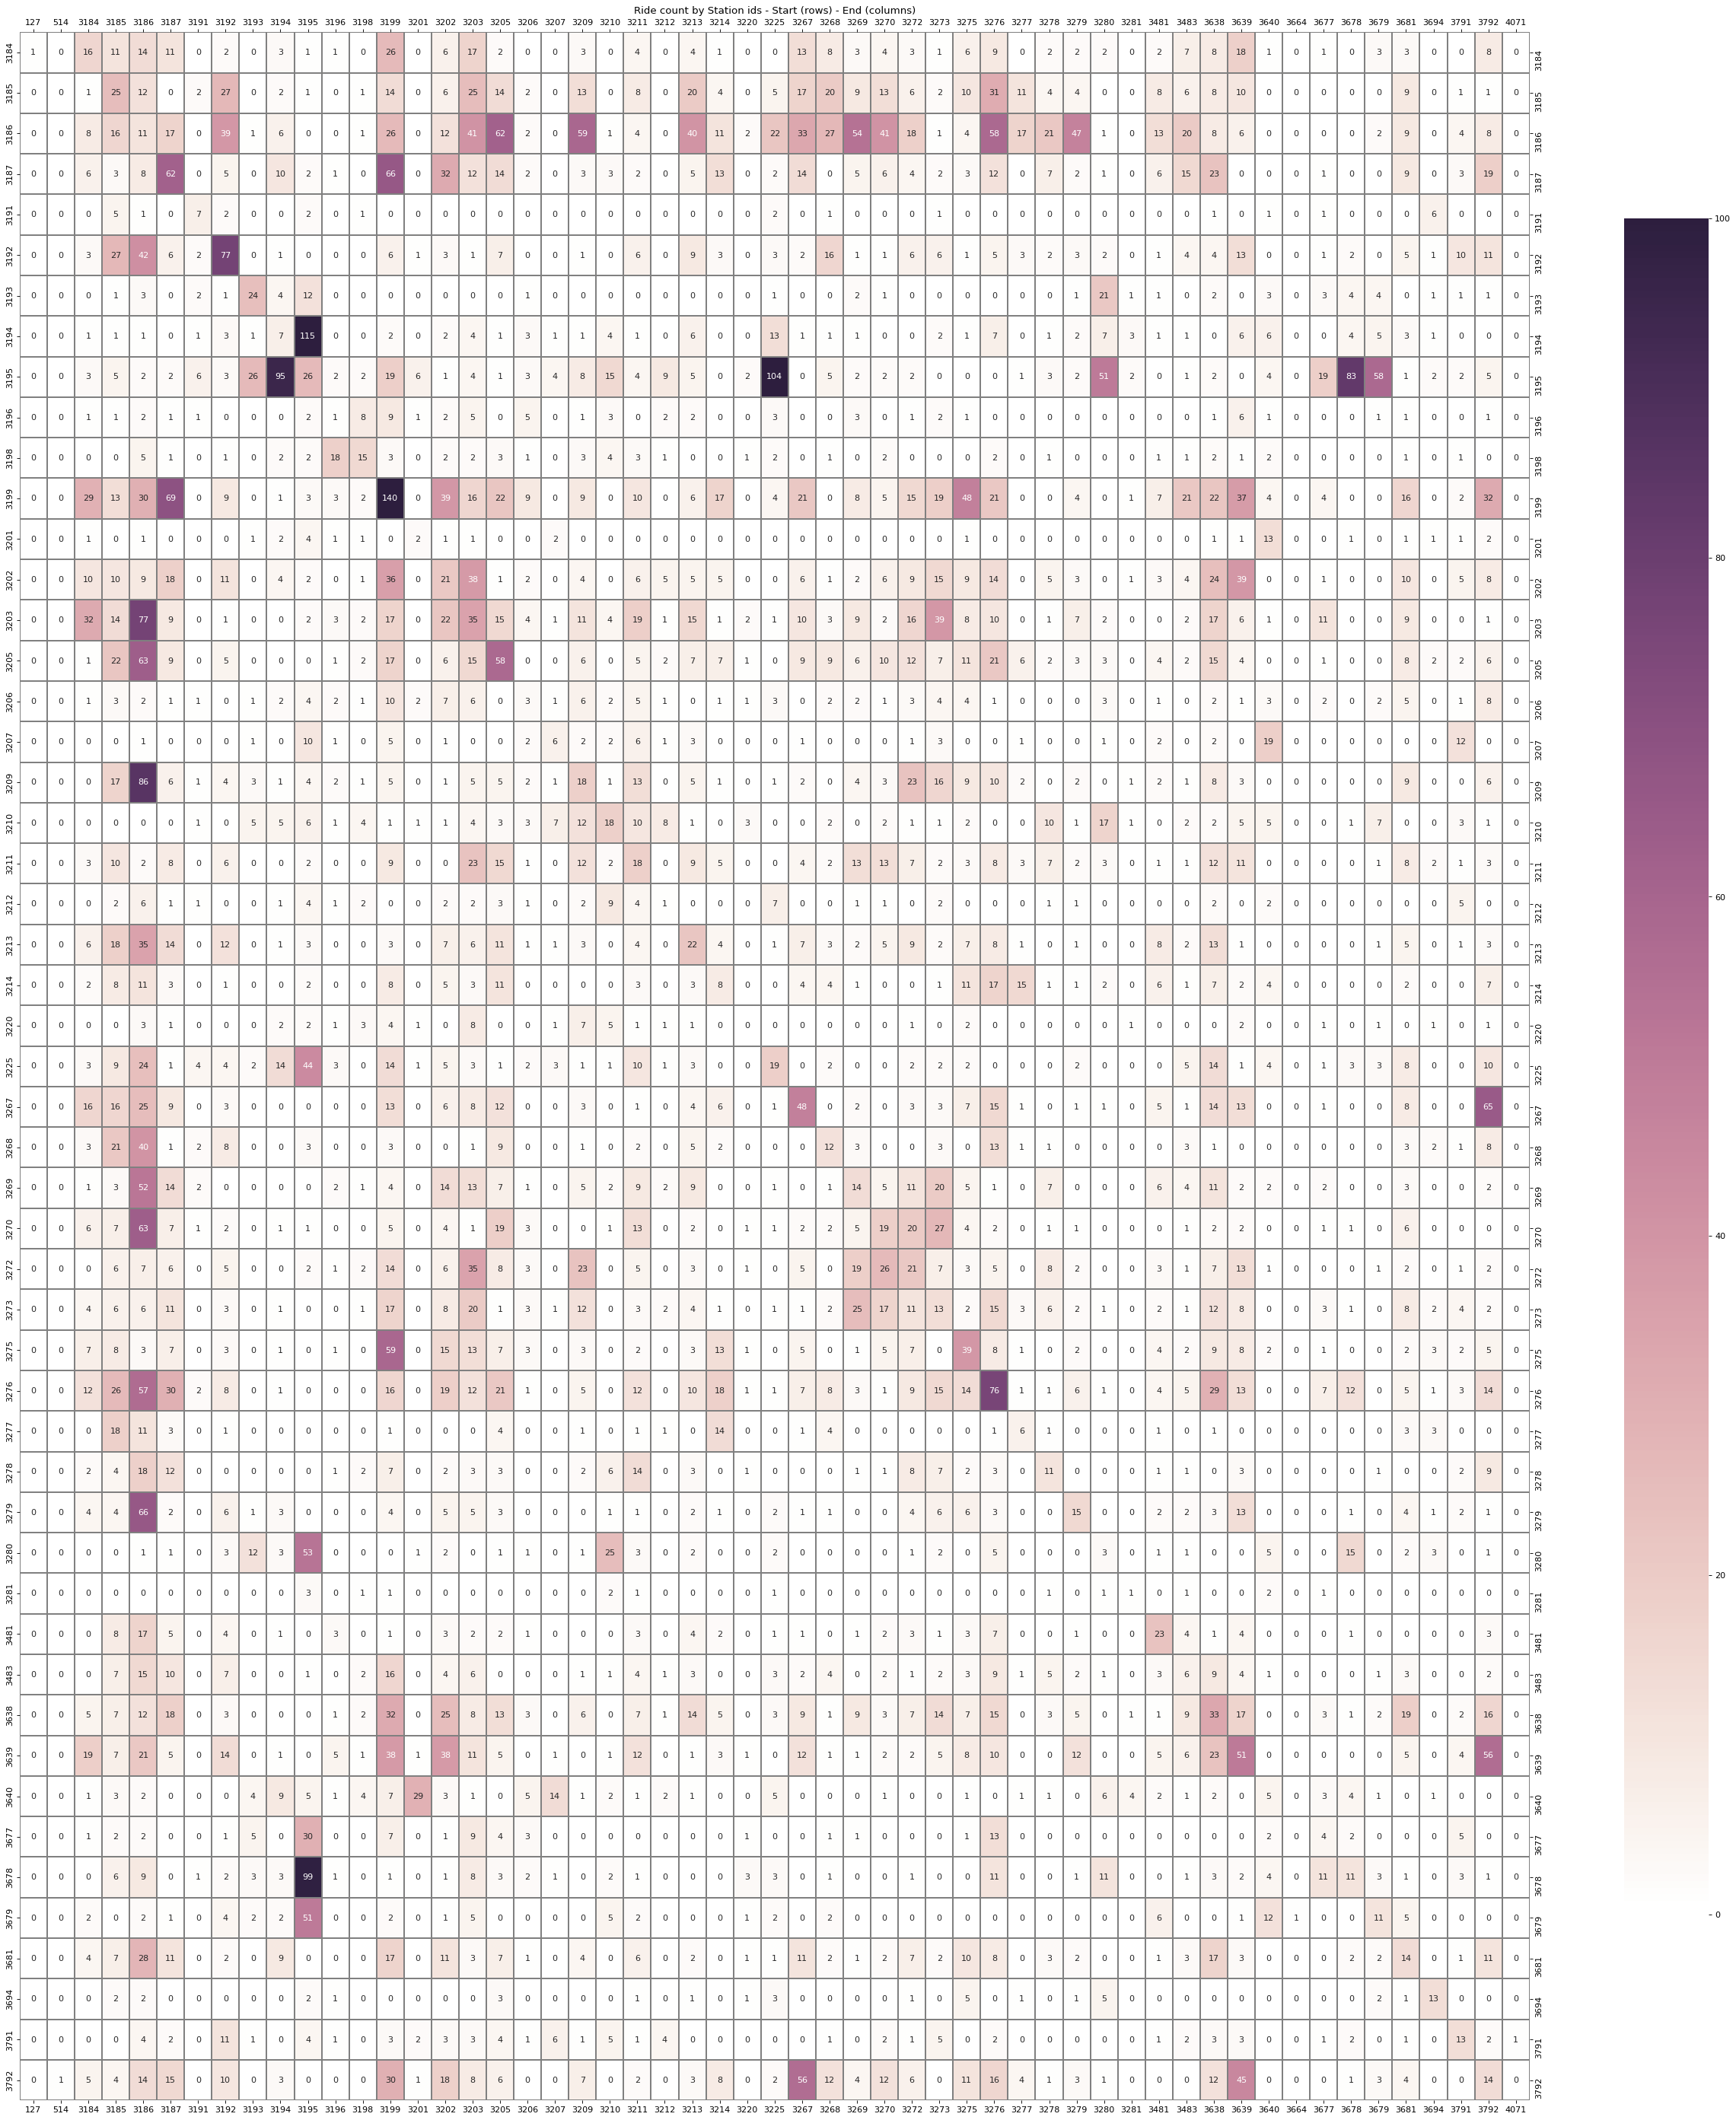

In [60]:
fig = plt.figure(num=None, figsize=(40, 45), dpi=80, facecolor='w', edgecolor='k')

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

res = sns.heatmap(df_start_end_counts, annot=True, vmin=0.0, vmax=100.0, 
                  fmt='.0f', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidths=0.1, linecolor='gray')

res.tick_params(right=True, top=True, labelright=True, labeltop=True)

plt.title("Ride count by Station ids - Start (rows) - End (columns)")

plt.savefig(os.path.join(OUTDIR, 'sns_heatmap.png'))

plt.show()